<a href="https://colab.research.google.com/github/sharmai309/fraudproject/blob/main/Fraud_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load fraud.csv and do quick EDA-friendly preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os

os.listdir("/content/drive/MyDrive")


['CraftDemo',
 'DSC_0123.JPG',
 'DSC_0089.JPG',
 'DSC_0057.JPG',
 'DSC_0132.JPG',
 'DSC_0133.JPG',
 'DSC_0203.JPG',
 'DSC_0215.JPG',
 'DSC_0220.JPG',
 'DSC_0274.JPG',
 'DSC_0301.JPG',
 'DSC_0302.JPG',
 'DSC_0319.JPG',
 'DSC_0322.JPG',
 'DSC_0323.JPG',
 'DSC_0332.JPG',
 'DSC_0340.JPG',
 'DSC_0357.JPG',
 'DSC_0364.JPG',
 'DSC_0371.JPG',
 'DSC_0438 (1).JPG',
 'DSC_0452.JPG',
 'DATAVIZ',
 'DataScienceProject',
 'Colab Notebooks',
 'KGS Datasheet.docx',
 'sdr_work',
 'Project1',
 'Checkstub for Isha Sharma - 12 13 2024.pdf',
 'IshaSharma.pdf',
 'Mental_HealthSentiment_Analysis',
 'TimeTablespreadsheet.gsheet',
 'Immigration_documents',
 'Bayesian_Statistics']

In [17]:
fraud_df= pd.read_csv("/content/drive/My Drive/CraftDemo/fraud.csv")

In [18]:
print(fraud_df.head())
print(fraud_df.shape)
print(fraud_df['Fraud'].value_counts(dropna=False))

   Identifier  IdentityScore  EAScore  UWScore  Owner_Verified_Components  \
0     1000001          550.0     81.0    2.167                          5   
1     1000002          539.0     98.0    1.730                          2   
2     1000003          361.0    500.0    0.744                          7   
3     1000004          442.0    119.0    0.405                          2   
4     1000005          431.0     82.0    1.063                          1   

   Owner_Negatively_Verified_Components  Owner_Phone_1_to_Name_Linkage  \
0                                     6                              2   
1                                     6                              1   
2                                     5                             -1   
3                                     8                              2   
4                                     8                              2   

   Owner_Phone_1_to_First_Name_Linkage  Owner_Address_to_Phone_1_Linkage  \
0               

In [19]:
# Basic missingness check
missing_counts = df.isna().sum()
print(missing_counts)

Identifier                                    0
IdentityScore                                 3
EAScore                                      50
UWScore                                       0
Owner_Verified_Components                     0
Owner_Negatively_Verified_Components          0
Owner_Phone_1_to_Name_Linkage                 0
Owner_Phone_1_to_First_Name_Linkage           0
Owner_Address_to_Phone_1_Linkage              0
Owner_Email_to_Phone_1_Linkage                0
Owner_Prepaid_Phone_Attribute                52
Owner_Business_Phone_Indicator               52
Owner_Phone_InService_Indicator              52
Owner_Phone_Type_Indicator                   52
Owner_Service_Discontinued_Indicator         52
Owner_Recent_Phone_Usage_Past_2_months       52
Owner_Phone_Usage_Past_12_months             52
Owner_Phone_Carrier                         188
Owner_Parent_Phone_Carrier                  190
Owner_Technology_Indicator                  190
Owner_VoIP_Indicator                    

                                    column  missing_pct
0                     Owner_VoIP_Indicator        82.51
1                     Owner_MVNO_Indicator        18.25
2               Owner_Technology_Indicator         0.88
3               Owner_Parent_Phone_Carrier         0.88
4                      Owner_Phone_Carrier         0.87
5            Owner_Prepaid_Phone_Attribute         0.24
6          Owner_Phone_InService_Indicator         0.24
7           Owner_Business_Phone_Indicator         0.24
8         Owner_Phone_Usage_Past_12_months         0.24
9   Owner_Recent_Phone_Usage_Past_2_months         0.24
10    Owner_Service_Discontinued_Indicator         0.24
11              Owner_Phone_Type_Indicator         0.24
12                                 EAScore         0.23
13                           IdentityScore         0.01
14                              Identifier         0.00
0.06963762385449132
                                                mean          std        min  \
Iden

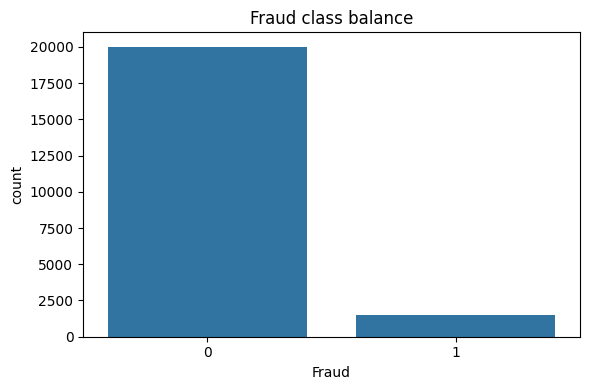

In [20]:
# Basic summaries: missingness, numeric stats, and correlation with Fraud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

na_rate = (fraud_df.isna().mean().sort_values(ascending=False) * 100).round(2)
na_tbl = na_rate.reset_index()
na_tbl.columns = ['column', 'missing_pct']
print(na_tbl.head(15))

num_cols = fraud_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in fraud_df.columns if c not in num_cols]

fraud_rate = fraud_df['Fraud'].mean()
print(fraud_rate)

num_desc = fraud_df[num_cols].describe().T
num_desc = num_desc[['mean','std','min','25%','50%','75%','max']]
print(num_desc.head(12))

corr_tbl = fraud_df[num_cols].corr(numeric_only=True)['Fraud'].sort_values(key=lambda s: s.abs(), ascending=False)
print(corr_tbl.head(15))

plt.figure(figsize=(6,4))
sns.countplot(data=fraud_df, x='Fraud')
plt.title('Fraud class balance')
plt.tight_layout()
plt.show()

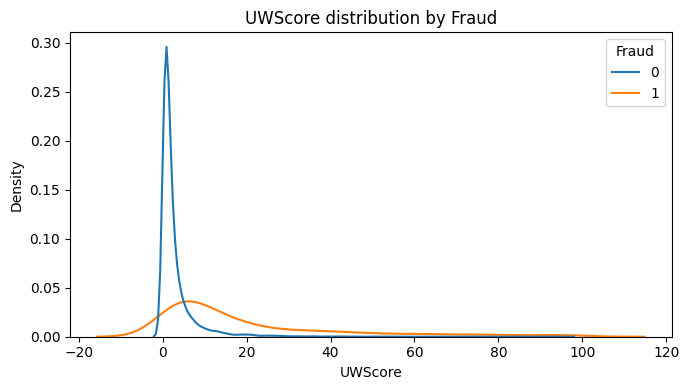

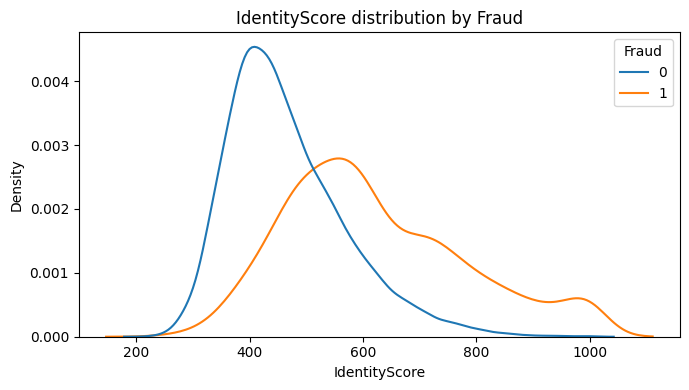

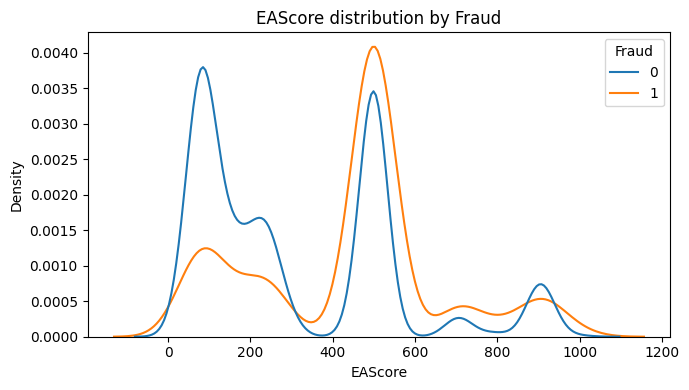

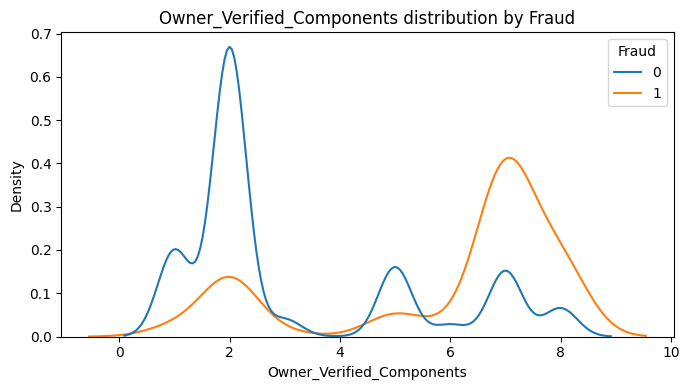

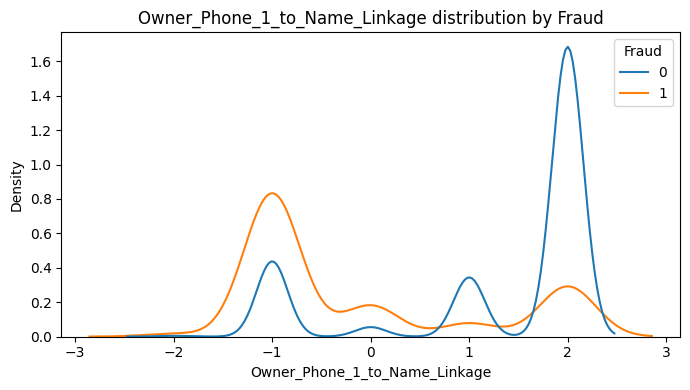

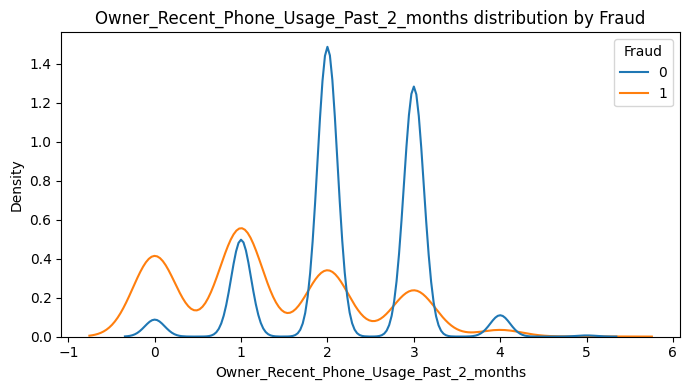

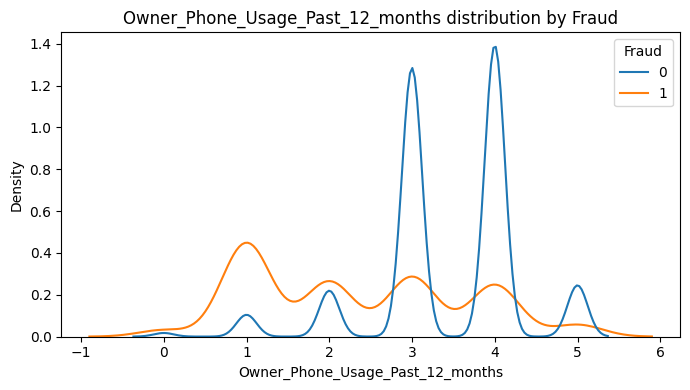

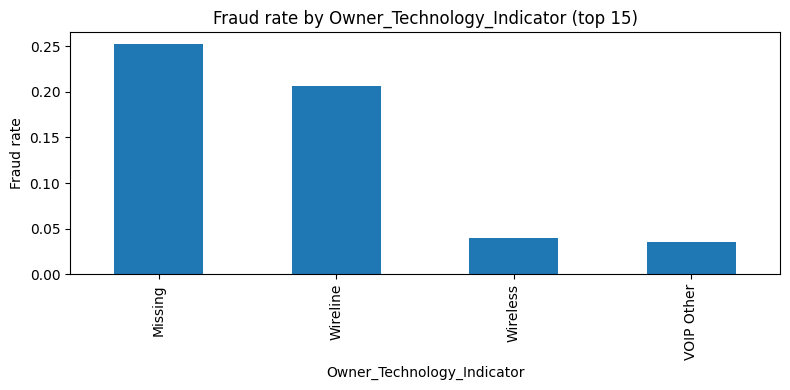

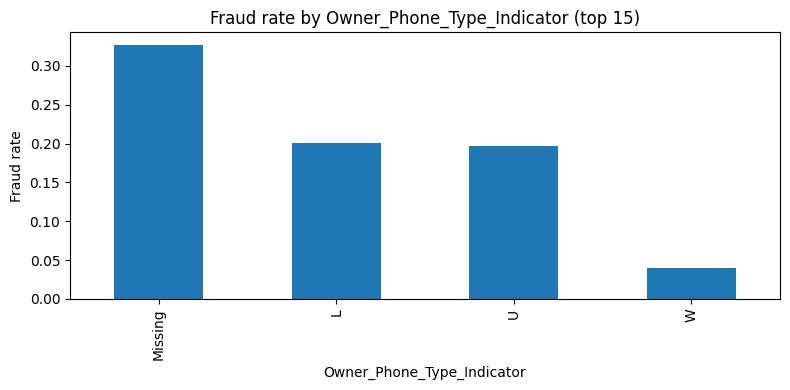

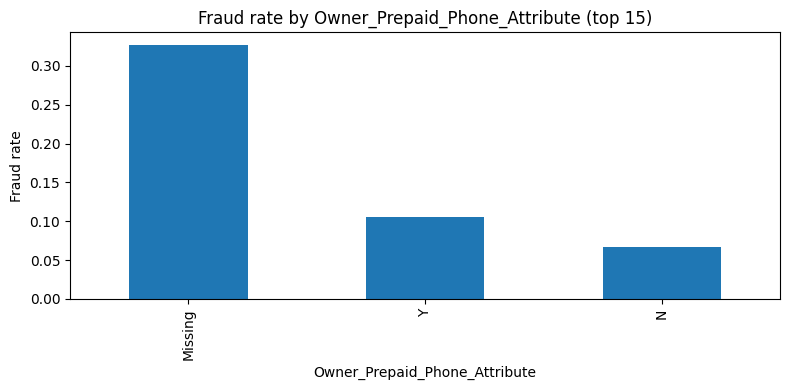

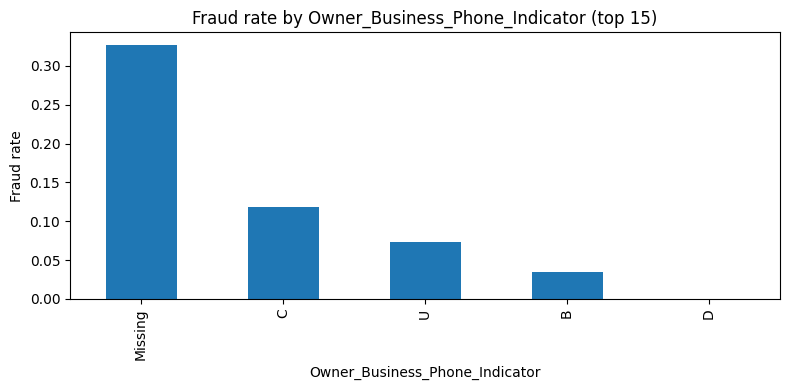

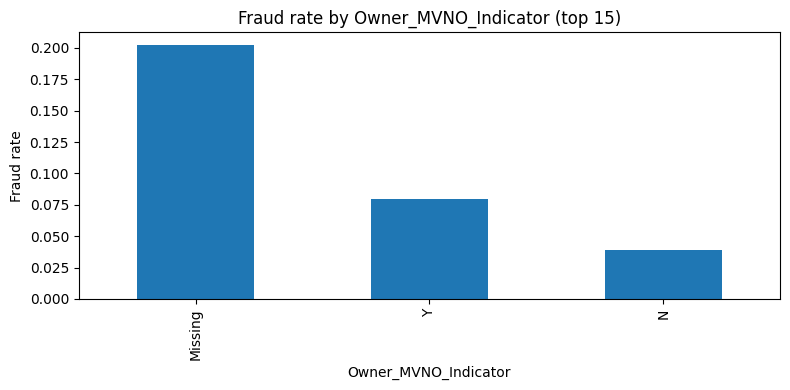

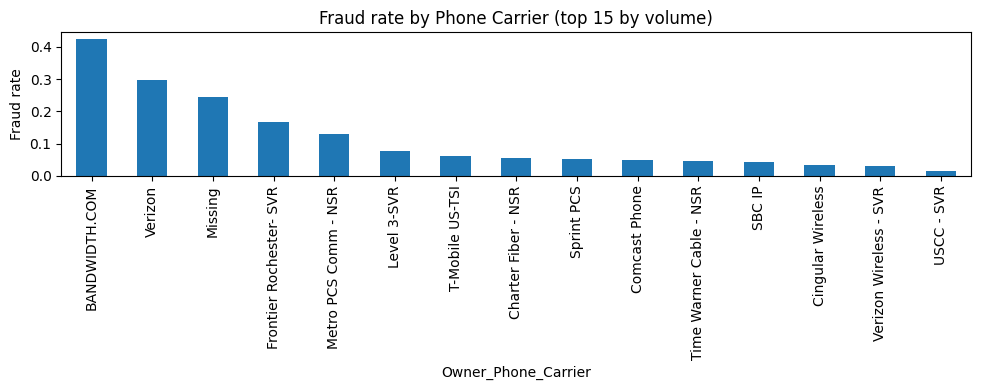

In [21]:
# Visual EDA: numeric distributions vs Fraud, and key categorical breakdowns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plot_num_cols = ['UWScore','IdentityScore','EAScore','Owner_Verified_Components','Owner_Phone_1_to_Name_Linkage',
                'Owner_Recent_Phone_Usage_Past_2_months','Owner_Phone_Usage_Past_12_months']
plot_num_cols = [c for c in plot_num_cols if c in fraud_df.columns]

for col in plot_num_cols:
    plt.figure(figsize=(7,4))
    sns.kdeplot(data=fraud_df, x=col, hue='Fraud', common_norm=False)
    plt.title(col + ' distribution by Fraud')
    plt.tight_layout()
    plt.show()

cat_check_cols = ['Owner_Technology_Indicator','Owner_Phone_Type_Indicator','Owner_Prepaid_Phone_Attribute','Owner_Business_Phone_Indicator','Owner_MVNO_Indicator']
cat_check_cols = [c for c in cat_check_cols if c in fraud_df.columns]

for col in cat_check_cols:
    tmp = fraud_df[[col,'Fraud']].copy()
    tmp[col] = tmp[col].fillna('Missing')
    rate = tmp.groupby(col)['Fraud'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    rate.head(15).plot(kind='bar')
    plt.ylabel('Fraud rate')
    plt.title('Fraud rate by ' + col + ' (top 15)')
    plt.tight_layout()
    plt.show()

# Focused on carriers: keep only top carriers by volume
carrier_col = 'Owner_Phone_Carrier'
if carrier_col in fraud_df.columns:
    tmp = fraud_df[[carrier_col,'Fraud']].copy()
    tmp[carrier_col] = tmp[carrier_col].fillna('Missing')
    top_carriers = tmp[carrier_col].value_counts().head(15).index
    rate_car = tmp[tmp[carrier_col].isin(top_carriers)].groupby(carrier_col)['Fraud'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,4))
    rate_car.plot(kind='bar')
    plt.ylabel('Fraud rate')
    plt.title('Fraud rate by Phone Carrier (top 15 by volume)')
    plt.tight_layout()
    plt.show()
